## Установка и добавление необходимых библиотек

In [15]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Объединение двух таблиц

In [20]:
data = pd.concat([pd.read_csv("datasets/winequality-red.csv"), pd.read_csv("datasets/winequality-white.csv")], ignore_index=True)

In [21]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Посмотрим есть ли в данных пробелы и все данные целые

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Посмотрим на столбец quality подробнее

In [23]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [24]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
%matplotlib inline

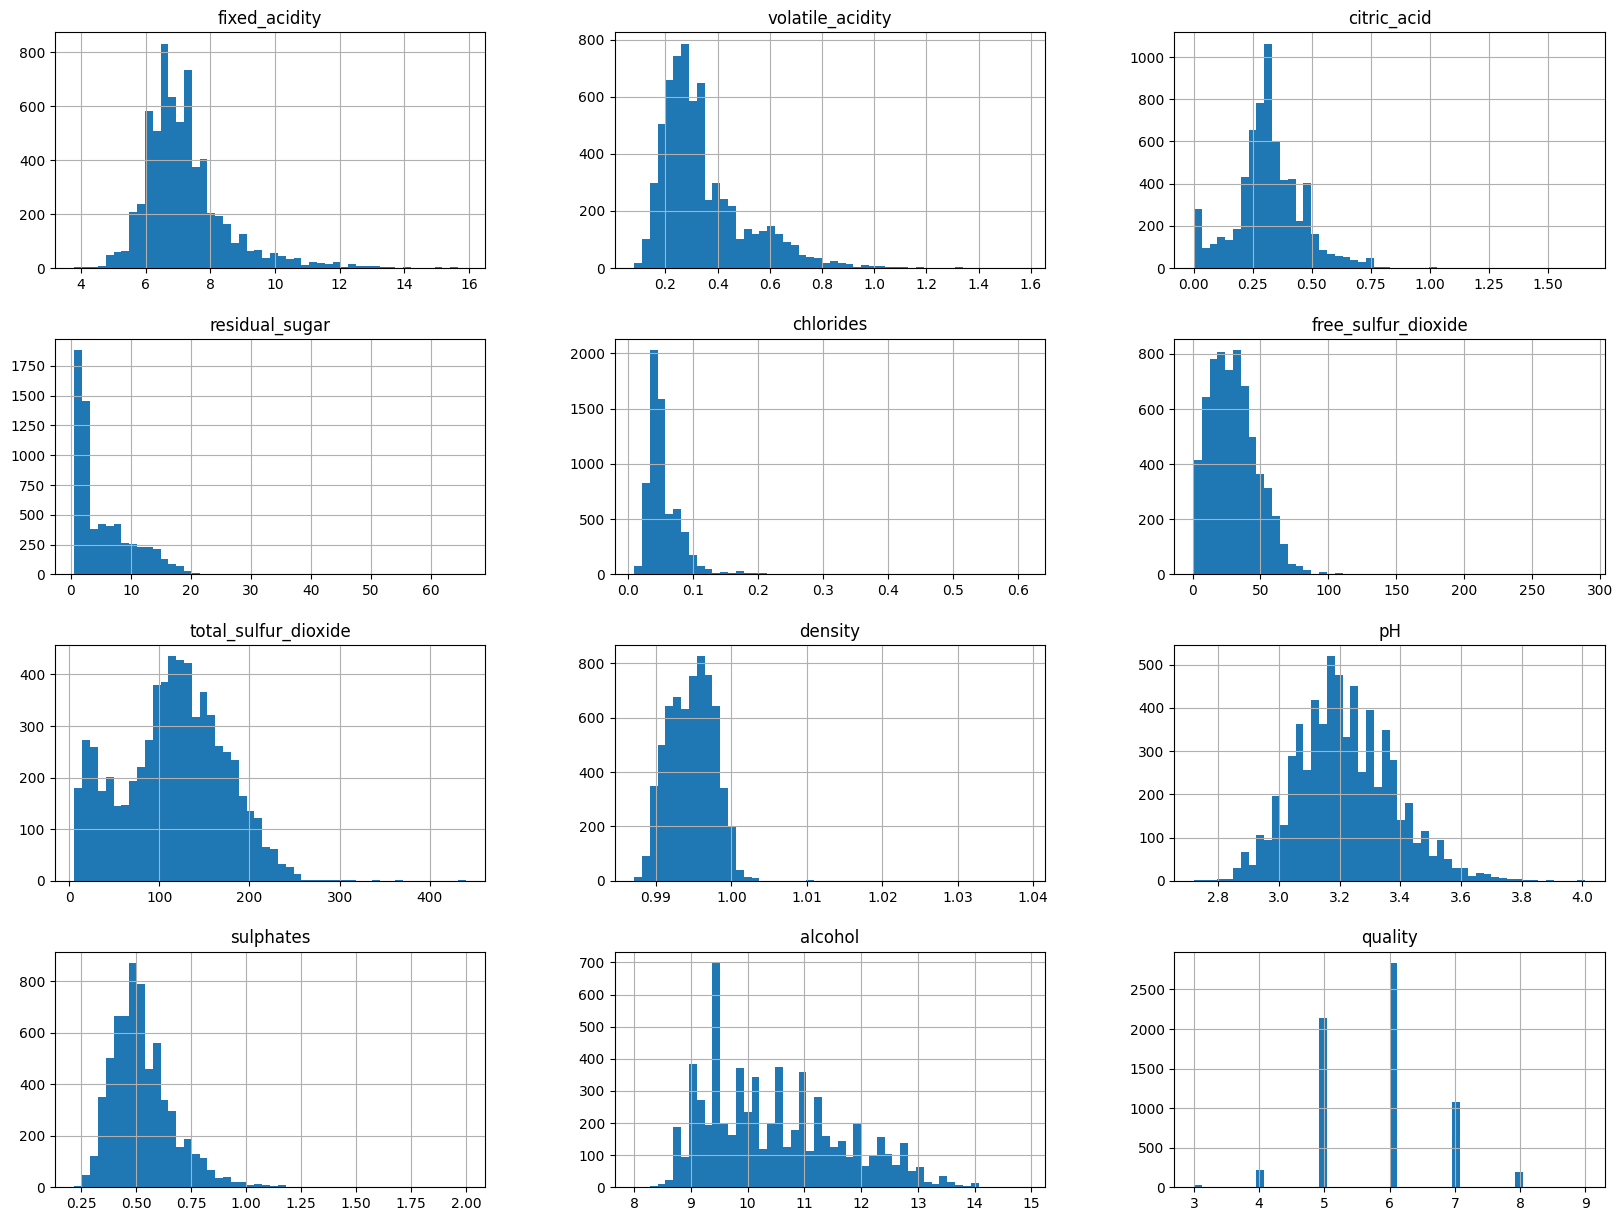

In [26]:
data.hist(bins=50,figsize=(20,15))
plt.show();

### Выведем минимальные и максимальные значения всех столбцов

In [27]:
print("Alcohol range:", data.alcohol.min(), data.alcohol.max())
print("Sulphates range:", data.sulphates.min(),data.sulphates.max())
print("Residual sugar range:", data.residual_sugar.min(),data.residual_sugar.max() )
print("Fixed acidity range:", data.fixed_acidity.min(),data.fixed_acidity.max() )
print("Volatile acidity range:", data.volatile_acidity.min(),data.volatile_acidity.max() )
print("Citric acid range:", data.citric_acid.min(),data.citric_acid.max() )
print("Chlorides range:", data.chlorides.min(),data.chlorides.max() )
print("Free sulfur dioxide range:", data.free_sulfur_dioxide.min(),data.free_sulfur_dioxide.max() )
print("Density range:", data.density.min(),data.density.max() )
print("PH range:", data.pH.min(),data.pH.max() )
print("Quality range:", data.quality.min(),data.quality.max() )

Alcohol range: 8.0 14.9
Sulphates range: 0.22 2.0
Residual sugar range: 0.6 65.8
Fixed acidity range: 3.8 15.9
Volatile acidity range: 0.08 1.58
Citric acid range: 0.0 1.66
Chlorides range: 0.009 0.611
Free sulfur dioxide range: 1.0 289.0
Density range: 0.98711 1.03898
PH range: 2.72 4.01
Quality range: 3 9


## Создание набора данных для теста и обучения

In [28]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Удалим quality и запишим в переменную, с небольшим условием

In [29]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
Y = data.quality.map({3:0,4:0,5:0,6:1,7:1,8:1,9:1})
data = data.drop('quality', axis = 1)

In [30]:
data_prepared = pipeline.fit_transform(data)
data_train, data_test, Y_train, Y_test = train_test_split(data_prepared, Y, test_size = 0.20)

### Линейная регресия

In [33]:
linearRegressor = LinearRegression()
param_grid = [
    {
        'copy_X': [False], 'fit_intercept': [False]
    }, 
    {
        'fit_intercept': [False]
    }
]
grid_search = GridSearchCV(linearRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_train,Y_train)

grid_search.best_params_

{'copy_X': False, 'fit_intercept': False}

In [56]:
linearRegressor = LinearRegression(copy_X=False, fit_intercept=False)
linearRegressor.fit(data_train, Y_train)
Y_pred = linearRegressor.predict(data_test)

file = open('models/linearRegression.pkl', 'wb')
pickle.dump(linearRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('models/BestParamlinearRegression.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 1, 1, 1, 0]
Прогноз Y:
 [0.2915604602603782, 0.0004082761147081587, 0.05091563652327646, 0.3768673666441003, -0.4283378047294219]


### Матрица ошибок

In [35]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[  0   0   0]
 [ 20 443   1]
 [  5 820  11]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.35      0.95      0.51       464
         1.0       0.92      0.01      0.03       836

    accuracy                           0.35      1300
   macro avg       0.42      0.32      0.18      1300
weighted avg       0.71      0.35      0.20      1300



c:\users\1dank\pycharmprojects\lab2\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\1dank\pycharmprojects\lab2\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\1dank\pycharmprojects\lab2\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


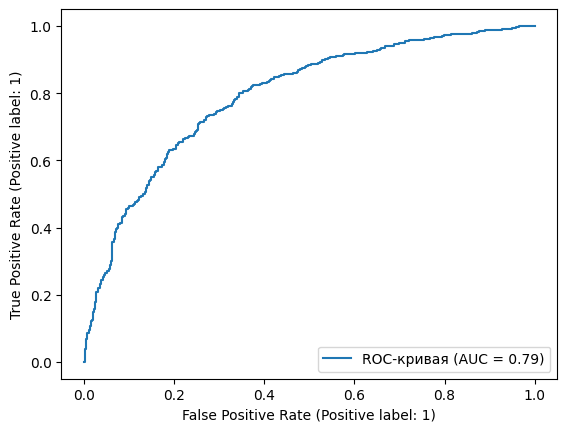

In [36]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

### Cлучайный лес(Random Forest, RF)

In [37]:
randomForestRegressor = RandomForestRegressor()

In [38]:
randomForestRegressor.get_params()
param_grid = [
    {
        'n_estimators':[4,15,40], 'max_features':[3,5,8]
    }, 
    {
        'bootstrap':[False],'n_estimators':[4,15,40]  
    }
]
grid_search = GridSearchCV(randomForestRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'max_features': 5, 'n_estimators': 40}

In [57]:
randomForestRegressor = RandomForestRegressor(max_features=5, n_estimators=40)
randomForestRegressor.fit(data_train, Y_train)
Y_pred = randomForestRegressor.predict(data_test)

file = open('models/randomForest.pkl', 'wb')
pickle.dump(randomForestRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('models/BestParamRandomForest.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Random Forest прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 1, 1, 1, 0]
Random Forest прогноз Y:
 [1.0, 0.7, 0.7, 1.0, 0.05]


### Матрица ошибок

In [40]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[336 128]
 [104 732]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       464
           1       0.85      0.88      0.86       836

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



### Оценка качества бинарной классификации

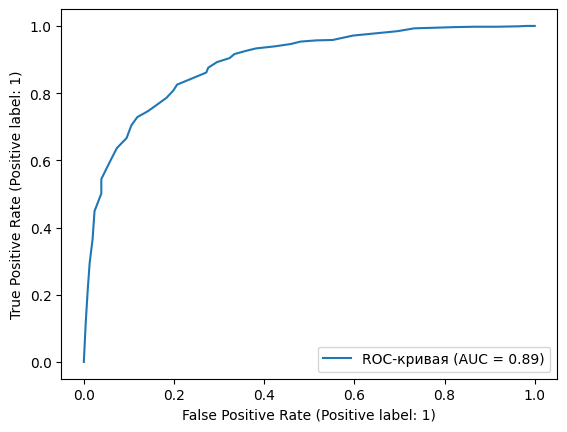

In [41]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

### Метод опорных векторов(Support vector machine)

In [42]:
svmRegressor = svm.SVC()
svmRegressor.get_params()
param_grid = [
    {
        'C': [1, 10, 100, 1000], 'kernel': ['linear']
    }, 
    {
        'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'] 
    }
]
grid_search = GridSearchCV(svmRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [58]:
svmRegressor = svm.SVC(C=100, gamma=0.001, kernel='rbf')
svmRegressor.fit(data_train, Y_train)
Y_pred = svmRegressor.predict(data_test)

file = open('models/SupportVectorMachine.pkl', 'wb')
pickle.dump(svmRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('models/BestParamSupportVectorMachine.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Support Vector Machine прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 1, 1, 1, 0]
Support Vector Machine прогноз Y:
 [1, 1, 1, 1, 0]


### Матрица ошибок

In [44]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[260 204]
 [116 720]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       464
           1       0.78      0.86      0.82       836

    accuracy                           0.75      1300
   macro avg       0.74      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300



### Оценка качества бинарной классификации

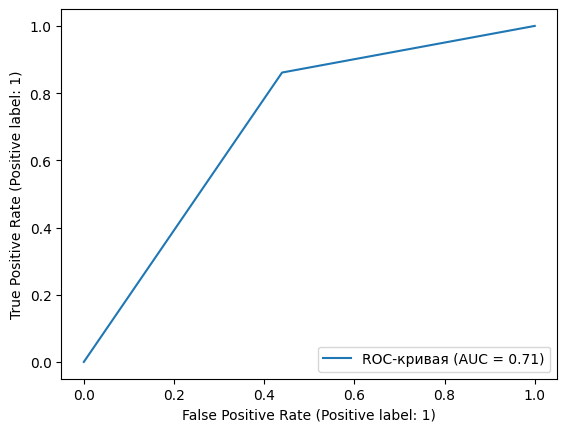

In [45]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

### Naive Bayes

In [46]:
nBRegressor = GaussianNB()

In [47]:
nBRegressor.get_params()
param_grid = [
    {
        'var_smoothing':[0.00000001, 0.000001, 0.001]
    } 
]
grid_search = GridSearchCV(nBRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'var_smoothing': 0.001}

In [59]:
nBRegressor = GaussianNB(var_smoothing=1e-08)
nBRegressor.fit(data_train, Y_train)
Y_pred = nBRegressor.predict(data_test)

file = open('models/NaiveBayes.pkl', 'wb')
pickle.dump(nBRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('models/BestParamNaiveBayes.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("Naive Bayes прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 1, 1, 1, 0]
Naive Bayes прогноз Y:
 [1, 0, 1, 1, 0]


### Матрица ошибок

In [49]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[251 213]
 [199 637]]
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       464
           1       0.75      0.76      0.76       836

    accuracy                           0.68      1300
   macro avg       0.65      0.65      0.65      1300
weighted avg       0.68      0.68      0.68      1300



### Оценка качества бинарной классификации

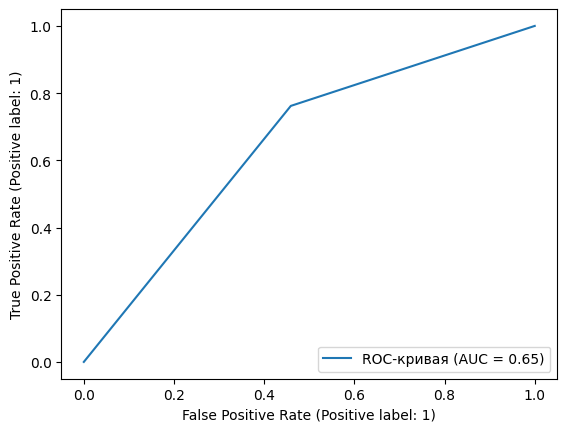

In [50]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")

### Метод k ближайших соседей(KNN)

In [51]:
knnRegressor = KNeighborsClassifier()

In [52]:
knnRegressor.get_params()
param_grid = [
    {
        'leaf_size': [10, 15, 20], 'n_neighbors': [3, 5, 7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    {
        'leaf_size': [10, 15, 25], 'n_neighbors': [2, 3, 4], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    } 
]
grid_search = GridSearchCV(knnRegressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y)

grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5}

In [60]:
knnRegressor = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3)
knnRegressor.fit(data_train, Y_train)
Y_pred = knnRegressor.predict(data_test)

file = open('models/KNN.pkl', 'wb')
pickle.dump(knnRegressor, file, pickle.HIGHEST_PROTOCOL)
file.close()

file = open('models/BestParamKNN.pkl', 'wb')
pickle.dump(grid_search.best_params_, file, pickle.HIGHEST_PROTOCOL)
file.close()

print("Y:\n", list(Y_test.iloc[:5]))
print("KNN прогноз Y:\n", list(Y_pred[:5]))

Y:
 [1, 1, 1, 1, 0]
KNN прогноз Y:
 [1, 0, 1, 1, 0]


### Матрица ошибок

In [54]:
print("Матрица ошибок")
print(confusion_matrix(Y_test,Y_pred.round()))
print(classification_report(Y_test,Y_pred.round()))

Матрица ошибок
[[286 178]
 [148 688]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       464
           1       0.79      0.82      0.81       836

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.72      1300
weighted avg       0.75      0.75      0.75      1300



### Оценка качества бинарной классификации

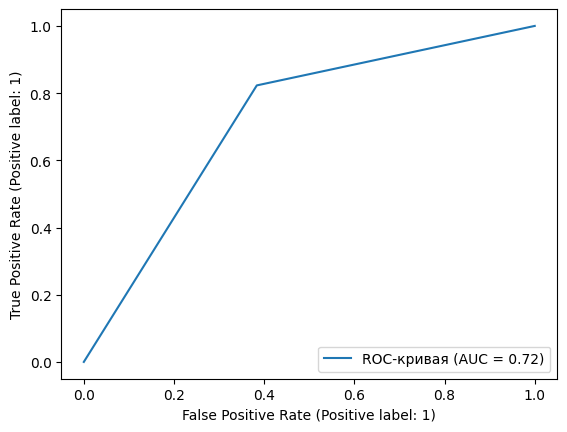

In [55]:
RocCurveDisplay.from_predictions(Y_test, Y_pred, name="ROC-кривая")